# Stock Time Series Prediction

In [16]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries
from utils import backtest

In [17]:
# Load data from data/bitcoin.csv:
# Date,Close/Last,Volume,Open,High,Low
# 03/09/2024,69484.50,N/A,68298.60,69676.40,68250.30
# 03/08/2024,68289.50,N/A,67152.10,68343.70,67923.90

df = pd.read_csv('data/bitcoin.csv')
df = df[['Date', 'Close/Last']]
df['Date'] = pd.to_datetime(df['Date'])
df.head(10)

,Date,Close/Last
0,2024-03-09,69484.5
1,2024-03-08,68289.5
2,2024-03-07,67079.5
3,2024-03-04,67802.9
4,2024-03-03,63605.8
5,2024-03-02,62027.8
6,2024-03-01,62218.2
7,2024-02-29,61429.3
8,2024-02-28,62509.4
9,2024-02-27,57157.2


In [18]:
# count NA values
df.isna().sum()
df.min()

Date          2019-03-08 00:00:00
Close/Last                 3864.9
dtype: object

In [19]:
df.describe()

,Date,Close/Last
count,1756,1756.000000
mean,2021-10-07 06:27:03.690204928,26921.632916
min,2019-03-08 00:00:00,3864.900000
25%,2020-07-25 18:00:00,10777.825000
50%,2021-10-07 12:00:00,25811.500000
75%,2022-12-24 06:00:00,39455.125000
max,2024-03-09 00:00:00,69484.500000
std,NaN,16018.936487


## Load time series data

In [20]:
series = TimeSeries.from_dataframe(df, time_col='Date', value_cols='Close/Last', fill_missing_dates=True, freq=None)

<Axes: xlabel='Date'>

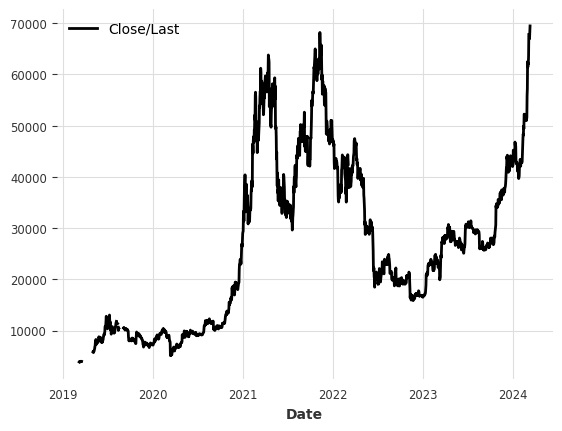

In [21]:
series.plot()

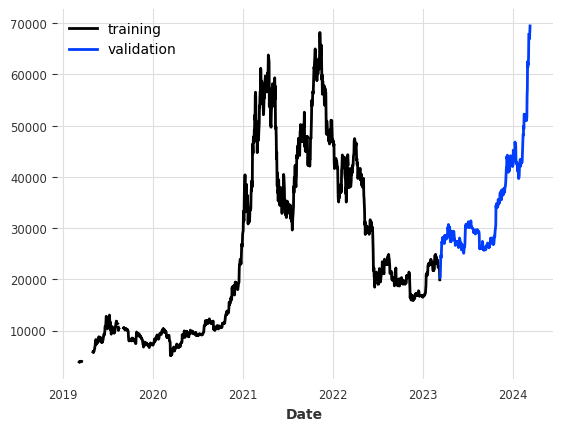

In [22]:
train, val = series.split_after(0.8)
train.plot(label="training")
val.plot(label="validation")

to_predict = len(val)

## Baseline Model

<Axes: xlabel='Date'>

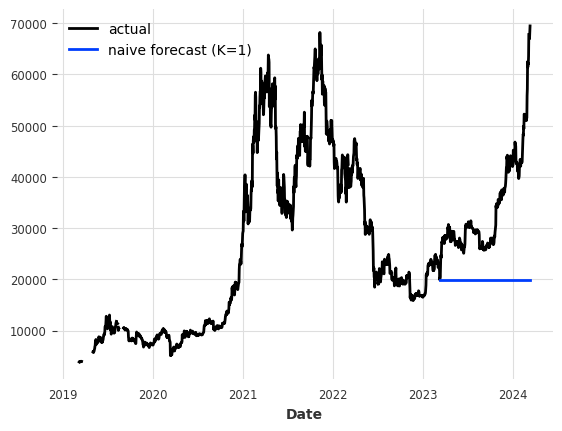

In [23]:
from darts.models import NaiveSeasonal

naive_model = NaiveSeasonal(K=1)
naive_model.fit(train)
naive_forecast = naive_model.predict(to_predict)

series.plot(label="actual")
naive_forecast.plot(label="naive forecast (K=1)")

In [24]:
# from darts.models.forecasting.xgboost import XGBModel

# xgb_model = XGBModel(
#     lags=12,
#     output_chunk_length=100,
# )

# xgb_model.fit(target, verbose=True)

# xgb_forecast = xgb_model.predict(to_predict)

# train.plot(label="actual")
# xgb_forecast.plot(label="xgboost forecast")


### Experiments

In [25]:
backtest([naive_model], series, dataset='bitcoin')